# Метод ближайших соседей

В данной работе реализован метод ближайших соседей, который предсказывает вероятность наличия болезни сердца из представленных характеристик в данном датасете:

    https://www.kaggle.com/ronitf/heart-disease-uci

Цель работы: Найти закономерность между данными характеристиками, чтобы прогнозировать вероятность болезни сердца у пациента.

Импортируем следующие библиотеки: numpy, pandas, а также matplotlib и seaborn для визуализации данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Установим дополнительные опции для работы с данными.

In [2]:
# Display up to 14 columns of a dataframe
pd.set_option('display.max_columns', 14)
# Set default font size
plt.rcParams['font.size'] = 24
sns.set(font_scale=2)

Откроем файл с Датасетом и просмотрим, что содержит в себе таблица.

In [3]:
data = pd.read_csv("C:\\Users\\UMGEBUNG\\ML_NeighborsClassifier-master-spoon\\heart.csv")
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


Отобразим тип данных для каждого столбца и количества не пропущенных значений. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Посмотрим на корреляцию значений в таблице.

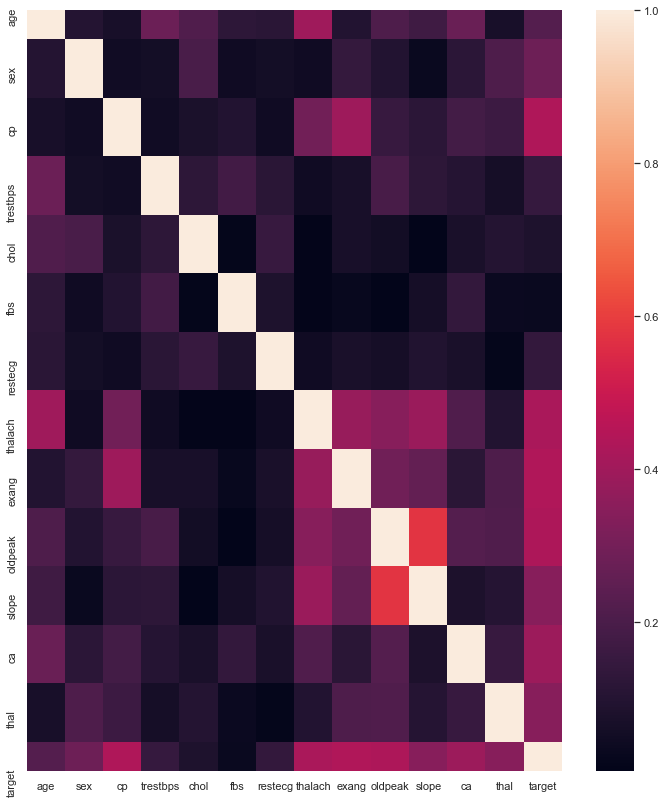

In [5]:
corr = data.corr().abs()
sns.set(rc={'figure.figsize':(12, 14)})

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Удалим из выборки признаки, высоко коррелирующие с другими. Уберем из Датасета колонки 'sex', 'thalach', 'exang', 'oldpeak', 'ca'.

In [6]:
extra_columns = ['slope']
data = data.drop(columns=list(extra_columns))

# Machine Learning

Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую.

In [7]:
X = data[data.columns[:-1]]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

Посмотрим, как влияет гиперпараметр на качество классификации.

In [8]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6578947368421053

Создадим пустой словарь. Будем добавлять в него значения наших "scores". Ключами будет значение гиперпараметра, значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.

In [9]:
train_scores = {}
test_scores = {}

for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score
    print(current_train_score, current_test_score)

1.0 0.7105263157894737
0.788546255506608 0.5789473684210527
0.7665198237885462 0.6447368421052632
0.7665198237885462 0.5921052631578947
0.7577092511013216 0.631578947368421
0.7577092511013216 0.6052631578947368
0.7577092511013216 0.618421052631579
0.7180616740088106 0.6842105263157895
0.7268722466960352 0.6842105263157895
0.6960352422907489 0.6973684210526315
0.6916299559471366 0.6578947368421053
0.6784140969162996 0.6447368421052632
0.6651982378854625 0.6447368421052632
0.6828193832599119 0.6842105263157895
0.6740088105726872 0.6710526315789473
0.6872246696035242 0.6842105263157895
0.6696035242290749 0.6973684210526315
0.6696035242290749 0.6842105263157895
0.6740088105726872 0.6842105263157895
0.6872246696035242 0.6578947368421053
0.6916299559471366 0.6578947368421053
0.6960352422907489 0.6578947368421053
0.7092511013215859 0.6710526315789473
0.6960352422907489 0.6973684210526315
0.6872246696035242 0.6842105263157895
0.6563876651982379 0.6578947368421053
0.6651982378854625 0.671052631

Выведем результат работы скрипта.

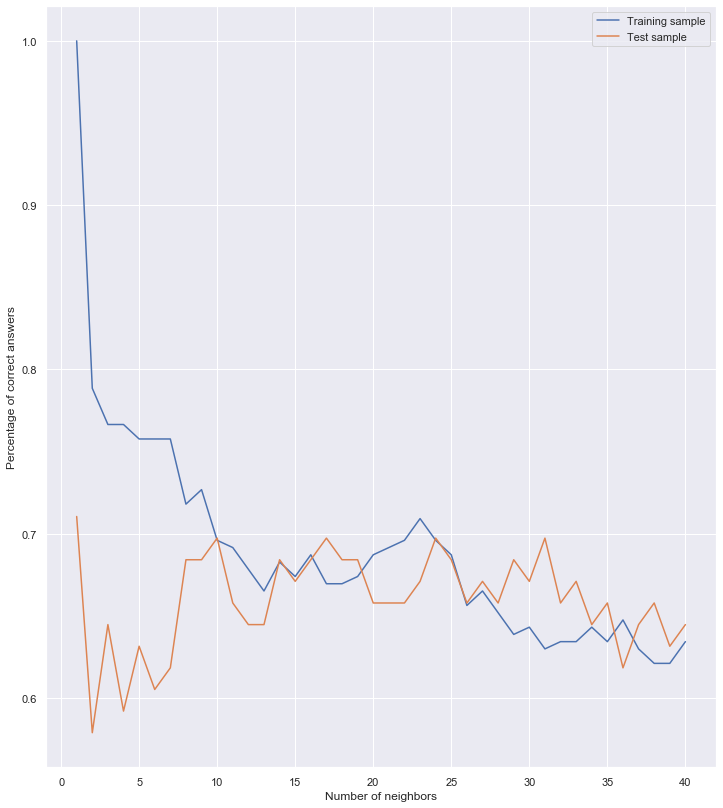

In [10]:
plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Training sample')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Test sample')
plt.xlabel('Number of neighbors')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()